# Management of Employee Absenteeism Project - Part 1

In [791]:
# Importing required Python Libraries
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Task 1- Data Cleaning

In [793]:
# Reading data from existing .csv file using read_csv() of pandas module and storing into a dataframe
absenteeism_data = pd.read_csv("D:/Documents/NIIT/Course9/Sprint7/DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv", delimiter=";")
absenteeism_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [794]:
# Shape of the dataset
print('The number of samples in data is {}.'.format(absenteeism_data.shape[0]))

The number of samples in data is 740.


In [795]:
# Understanding Data
absenteeism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [796]:
# Check for missing values in each column
missing_values = absenteeism_data.isnull().sum()
print('Missing values in each column:\n', missing_values)

Missing values in each column:
 ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64


Interpretation- There are no missing values in the dataset.

In [798]:
# Setting labels to ordinal types of columns
# Define categories (bins) and labels for Reason for absence column
bins = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
labels = ['Certain infectious and parasitic diseases', 'Neoplasms', 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism', 'Endocrine, nutritional and metabolic diseases', 'Mental and behavioural disorders', 'Diseases of the nervous system', 'Diseases of the eye and adnexa', 'Diseases of the ear and mastoid process', 'Diseases of the circulatory system', 'Diseases of the respiratory system', 'Diseases of the digestive system', 'Diseases of the skin and subcutaneous tissue', 'Diseases of the musculoskeletal system and connective tissue', 'Diseases of the genitourinary system', 'Pregnancy, childbirth and the puerperium', 'Certain conditions originating in the perinatal period', 'Congenital malformations, deformations and chromosomal abnormalities', 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified', 'Injury, poisoning and certain other consequences of external causes', 'External causes of morbidity and mortality', 'Factors influencing health status and contact with health services', 'patient follow-up', 'medical consultation', 'blood donation', 'laboratory examination', 'unjustified absence', 'physiotherapy', 'dental consultation']
# Convert column to categorical with labels
absenteeism_data['Reason for absence_c'] = pd.cut(absenteeism_data['Reason for absence'], bins=bins, labels=labels)
absenteeism_data['Reason for absence_c'].unique()

['physiotherapy', 'Certain infectious and parasitic diseases', 'blood donation', 'Diseases of the ear and mastoid process', 'medical consultation', ..., 'Certain conditions originating in the perinat..., 'Mental and behavioural disorders', 'Endocrine, nutritional and metabolic diseases', 'Diseases of the blood and blood-forming organ..., 'Congenital malformations, deformations and ch...]
Length: 28
Categories (28, object): ['Certain infectious and parasitic diseases' < 'Neoplasms' < 'Diseases of the blood and blood-forming organ... < 'Endocrine, nutritional and metabolic diseases' ... 'laboratory examination' < 'unjustified absence' < 'physiotherapy' < 'dental consultation']

In [799]:
# Setting labels to ordinal types of columns
# Define categories (bins) and labels for Month of absence column
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Ensure the number of labels is one fewer than the number of bins
if len(bins) != len(labels) + 1:
  raise ValueError("Bins must be one element more than labels")
# Convert column to categorical with labels
absenteeism_data['Month of absence_c'] = pd.cut(absenteeism_data['Month of absence'], bins=bins, labels=labels)
absenteeism_data['Month of absence_c'].unique()

['July', 'August', 'September', 'October', 'November', ..., 'March', 'April', 'May', 'June', NaN]
Length: 13
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']

In [800]:
# Setting labels to ordinal types of columns
# Define thresholds and corresponding labels for Age column
thresholds = [30,35,40,45,50,55] 
labels = ['25 to 30', '30 to 35', '35 to 40', '40 to 45', '45 tο 50','50 to 55', '55 to 60']

# Function to assign labels based on conditions
def assign_label(value):
    if value <= thresholds[0]:
        return labels[0]
    elif value <= thresholds[1]:
        return labels[1]
    elif value <= thresholds[2]:
        return labels[2]
    elif value <= thresholds[3]:
        return labels[3]
    elif value <= thresholds[4]:
        return labels[4]
    elif value <= thresholds[5]:
        return labels[5]
    else:
        return labels[6]

# Apply the function to the column and create a new column with labels
absenteeism_data['Age_c'] = absenteeism_data['Age'].apply(assign_label)
print(f'Number of unique values: {absenteeism_data['Age_c'].unique()}')

Number of unique values: ['30 to 35' '45 tο 50' '35 to 40' '25 to 30' '40 to 45' '55 to 60'
 '50 to 55']


In [801]:
# Setting labels to ordinal types of columns
# Define categories (bins) and labels for Disciplinary failure column
bins = [-1, 0, 1]
labels = ['No', 'Yes']
# Convert column to categorical with labels
absenteeism_data['Disciplinary failure_c'] = pd.cut(absenteeism_data['Disciplinary failure'], bins=bins, labels=labels)
absenteeism_data['Disciplinary failure_c'].unique()

['No', 'Yes']
Categories (2, object): ['No' < 'Yes']

In [802]:
# Setting labels to ordinal types of columns
# Define categories (bins) and labels for Education column
bins = [0,1,2,3,4]
labels = ["high school", "graduate", "postgraduate", "master and doctor"]
#Convert column to categorical with labels
absenteeism_data['Education_c'] = pd.cut(absenteeism_data['Education'], bins=bins, labels=labels)
absenteeism_data['Education_c'].unique()

['high school', 'postgraduate', 'graduate', 'master and doctor']
Categories (4, object): ['high school' < 'graduate' < 'postgraduate' < 'master and doctor']

In [803]:
# Setting labels to ordinal types of columns
# Define categories (bins) and labels for Social drinker column
bins = [-1, 0, 1]
labels = ['No', 'Yes']
# Convert column to categorical with labels
absenteeism_data['Social drinker_c'] = pd.cut(absenteeism_data['Social drinker'], bins=bins, labels=labels)
absenteeism_data['Social drinker_c'].unique()

['Yes', 'No']
Categories (2, object): ['No' < 'Yes']

In [804]:
# Setting labels to ordinal types of columns
# Define categories (bins) and labels for Social smoker column
bins = [-1, 0, 1]
labels = ['No', 'Yes']
# Convert column to categorical with labels
absenteeism_data['Social smoker_c'] = pd.cut(absenteeism_data['Social smoker'], bins=bins, labels=labels)
absenteeism_data['Social smoker_c'].unique()

['No', 'Yes']
Categories (2, object): ['No' < 'Yes']

In [805]:
# Setting labels to ordinal types of columns
# Define categories (bins) and labels for Hit target column
absenteeism_data['Hit target_c'] = np.where(absenteeism_data['Hit target'] > absenteeism_data['Hit target'].median(), 'Achieved', 'Not Achieved')
# Print the number of unique values
print(f"Number of unique values: {absenteeism_data['Hit target_c'].unique()}")

Number of unique values: ['Achieved' 'Not Achieved']


In [806]:
print(f"Number of unique values: {absenteeism_data['Absenteeism time in hours'].nunique()}")
print(f"Max: {absenteeism_data['Absenteeism time in hours'].max()}")
print(f"Min: {absenteeism_data['Absenteeism time in hours'].min()}")

Number of unique values: 19
Max: 120
Min: 0


In [807]:
# Setting labels to ordinal types of columns
# Define categories (bins) and labels for Absenteeism time in hours column
absenteeism_data['Absenteeism time in hours_c'] = np.where(absenteeism_data['Absenteeism time in hours'] > absenteeism_data['Absenteeism time in hours'].median(), 'High Absenteeism', 'Low Absenteeism')
# Print the number of unique values
print(f"Number of unique values: {absenteeism_data['Absenteeism time in hours_c'].unique()}")

Number of unique values: ['High Absenteeism' 'Low Absenteeism']


In [808]:
#Encoding Absenteeism time in hours variable
absent_encoder = preprocessing.LabelEncoder()
absent_encoder.fit(absenteeism_data['Absenteeism time in hours_c'])
print(absent_encoder.classes_)
absenteeism_data['Absenteeism time in hours.enc'] = absent_encoder.transform(absenteeism_data['Absenteeism time in hours_c'])

['High Absenteeism' 'Low Absenteeism']


Interpretation- Labels have been set to ordinal columns and made categorical. Absenteeism time in hours variable has been encoded.

In [810]:
absenteeism_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Reason for absence_c,Month of absence_c,Age_c,Disciplinary failure_c,Education_c,Social drinker_c,Social smoker_c,Hit target_c,Absenteeism time in hours_c,Absenteeism time in hours.enc
0,11,26,7,3,1,289,36,13,33,239.554,...,physiotherapy,July,30 to 35,No,high school,Yes,No,Achieved,High Absenteeism,0
1,36,0,7,3,1,118,13,18,50,239.554,...,Certain infectious and parasitic diseases,July,45 tο 50,Yes,high school,Yes,No,Achieved,Low Absenteeism,1
2,3,23,7,4,1,179,51,18,38,239.554,...,blood donation,July,35 to 40,No,high school,Yes,No,Achieved,Low Absenteeism,1
3,7,7,7,5,1,279,5,14,39,239.554,...,Diseases of the ear and mastoid process,July,35 to 40,No,high school,Yes,Yes,Achieved,High Absenteeism,0
4,11,23,7,5,1,289,36,13,33,239.554,...,blood donation,July,30 to 35,No,high school,Yes,No,Achieved,Low Absenteeism,1


In [811]:
# Retrieving Absenteeism time in hours.enc column from the dataset and storing into another dataframe
Absenteeism_col_df = pd.DataFrame(absenteeism_data[['Absenteeism time in hours.enc']])

# Removing Absenteeism time in hours.enc column from the dataset as scaling is not required for this column
new_df = pd.DataFrame(absenteeism_data.drop(['Absenteeism time in hours.enc'], axis=1))

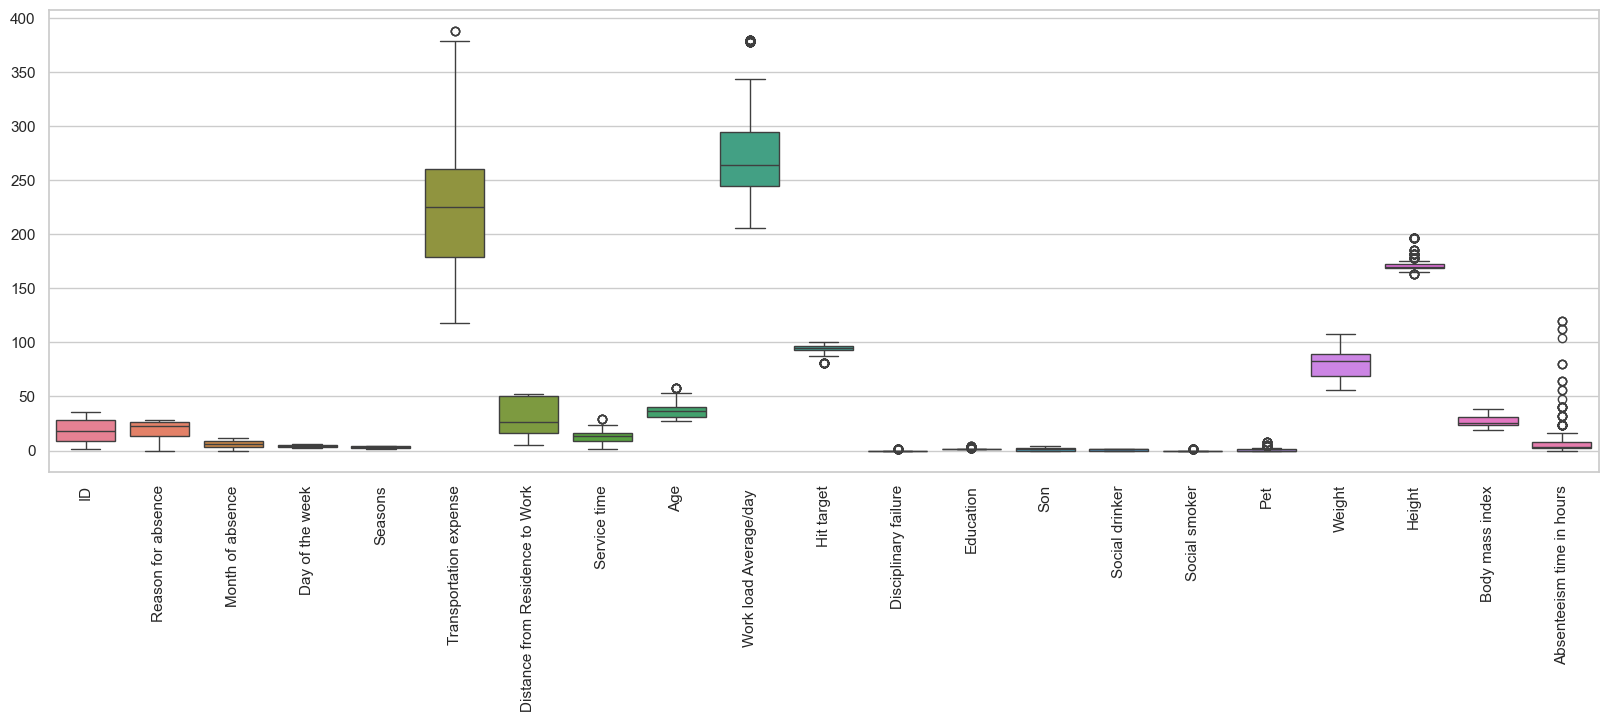

In [812]:
# Outlier Assessment
sns.boxplot(data=new_df)  # All columns by default
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=90)
plt.show()

Interpretation- Data exists with outliers.

In [814]:
# Outlier Treatment
def iqr_winsorization(df, thresh=1.5):
    df_numeric = df.select_dtypes(include=[np.number])  # Select numeric columns
    columns_to_treat = df_numeric.columns

    for col in columns_to_treat:
        Q1 = df_numeric[col].quantile(0.25)
        Q3 = df_numeric[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define fences
        lower_fence = Q1 - thresh * IQR
        upper_fence = Q3 + thresh * IQR

        # Winsorize outliers
        df_numeric.loc[df_numeric[col] < lower_fence, col] = lower_fence
        df_numeric.loc[df_numeric[col] > upper_fence, col] = upper_fence

    return df_numeric

df = pd.DataFrame(new_df)
# Perform outlier treatment on all columns
absenteeism_treated_df = iqr_winsorization(df.copy())
print(absenteeism_treated_df)

       ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0    11.0                26.0                 7                3        1   
1    36.0                 0.0                 7                3        1   
2     3.0                23.0                 7                4        1   
3     7.0                 7.0                 7                5        1   
4    11.0                23.0                 7                5        1   
..    ...                 ...               ...              ...      ...   
735  11.0                14.0                 7                3        1   
736   1.0                11.0                 7                3        1   
737   4.0                 0.0                 0                3        1   
738   8.0                 0.0                 0                4        2   
739  35.0                 0.0                 0                6        3   

     Transportation expense  Distance from Residence to Work  Service time 

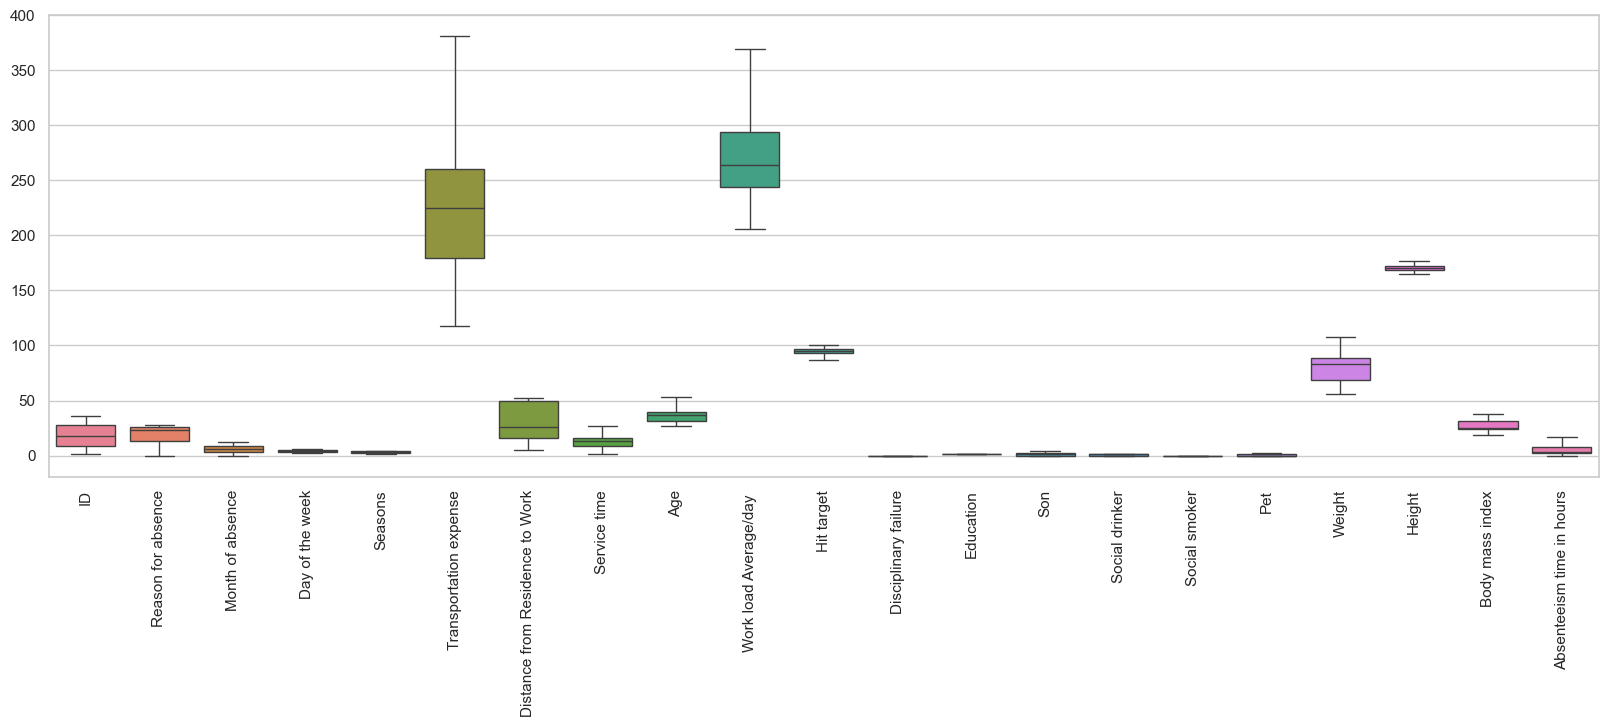

In [815]:
# Outlier Assessment after Outlier Treatment
sns.boxplot(data=absenteeism_treated_df)  # All columns by default
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=90)
plt.show()

Interpretation- No outliers exist in the dataset post outlier treatment.

In [817]:
# Checking Multicollinearity among independent variables for final feature selection
# Selecting the cutoff value as 0.7
abs(absenteeism_treated_df.corr())>=0.7 # ignored the dependent column for scaling

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Reason for absence,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Month of absence,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Day of the week,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Seasons,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Transportation expense,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Distance from Residence to Work,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Service time,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Age,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Work load Average/day,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


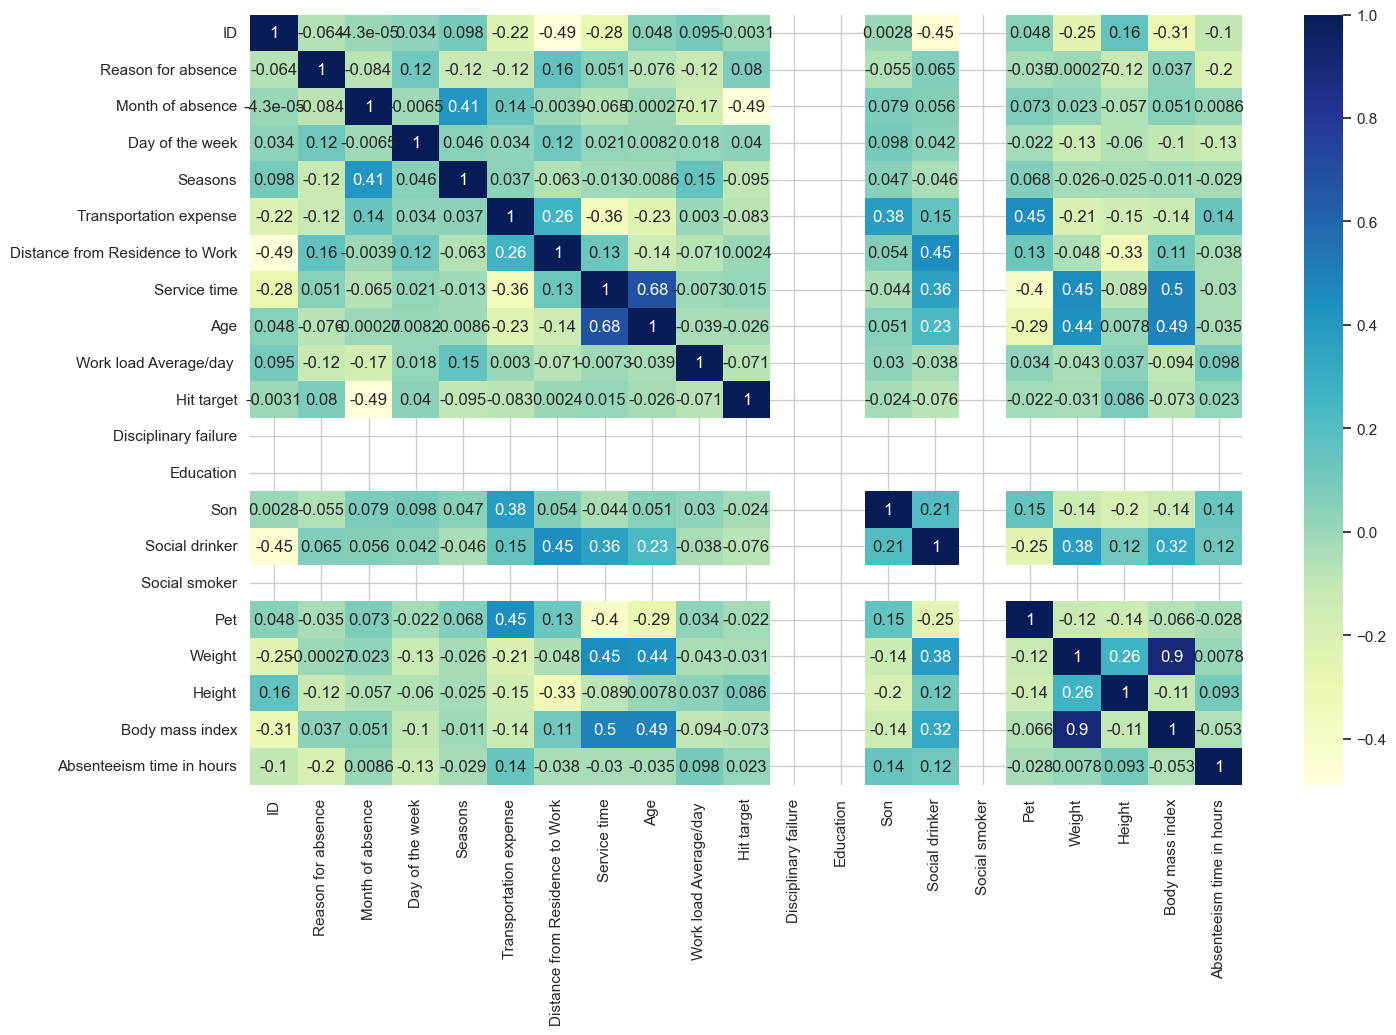

In [818]:
# Plotting heatmap for correlation
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
ax = sns.heatmap(absenteeism_treated_df.corr(), annot=True, cmap="YlGnBu")
plt.show()

Interpretation- Due to high correlation of the Weight with Body mass index, dropping Body mass index.

In [820]:
# Dropping columns Body mass index due to high multi collinearity
absenteeism_treated_df = absenteeism_treated_df.drop(['Body mass index'], axis=1)
absenteeism_treated_df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Absenteeism time in hours
0,11.0,26.0,7,3,1,289.0,36,13.0,33.0,239.554,97,0,1,2,1.0,0,1.0,90,172.0,4
1,36.0,0.0,7,3,1,118.0,13,18.0,50.0,239.554,97,0,1,1,1.0,0,0.0,98,176.5,0
2,3.0,23.0,7,4,1,179.0,51,18.0,38.0,239.554,97,0,1,0,1.0,0,0.0,89,170.0,2
3,7.0,7.0,7,5,1,279.0,5,14.0,39.0,239.554,97,0,1,2,1.0,0,0.0,68,168.0,4
4,11.0,23.0,7,5,1,289.0,36,13.0,33.0,239.554,97,0,1,2,1.0,0,1.0,90,172.0,2


In [821]:
# To show the correlation values from most negatively correlated to the most positively correlated
sorted_corr = absenteeism_treated_df.corr()[['Absenteeism time in hours']].sort_values(by='Absenteeism time in hours', ascending=False)
sorted_corr

,Absenteeism time in hours
Absenteeism time in hours,1.000000
Son,0.143931
Transportation expense,0.141225
Social drinker,0.118731
Work load Average/day,0.098170
Height,0.092961
Hit target,0.022902
Month of absence,0.008612
Weight,0.007797
Pet,-0.027994


Interpretation- The features with the highest correlation values with Absenteeism time in hours are- Son, Transportation expense, Social drinker and Work load Average/day.

In [823]:
#Scaling Data
cols = absenteeism_treated_df.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(absenteeism_treated_df)
df_scaled = pd.DataFrame(df_scaled, columns=cols)
df_scaled.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Absenteeism time in hours
0,-0.637161,0.804938,0.196763,-0.643947,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,0.0,0.0,0.893723,0.872872,0.0,0.465851,0.851673,0.333508,-0.233397
1,1.632719,-2.280124,0.196763,-0.643947,-1.390175,-1.545473,-1.121694,1.263697,2.149126,-0.830594,0.681528,0.0,0.0,-0.017234,0.872872,0.0,-0.702725,1.473056,1.862181,-1.123676
2,-1.363523,0.448970,0.196763,0.059924,-1.390175,-0.632881,1.441240,1.263697,0.252650,-0.830594,0.681528,0.0,0.0,-0.928191,0.872872,0.0,-0.702725,0.774000,-0.345902,-0.678537
3,-1.000342,-1.449530,0.196763,0.763796,-1.390175,0.863172,-1.661258,0.338393,0.410690,-0.830594,0.681528,0.0,0.0,0.893723,0.872872,0.0,-0.702725,-0.857131,-1.025313,-0.233397
4,-0.637161,0.448970,0.196763,0.763796,-1.390175,1.012777,0.429556,0.107066,-0.537549,-0.830594,0.681528,0.0,0.0,0.893723,0.872872,0.0,0.465851,0.851673,0.333508,-0.678537


Interpretation- Data has been scaled using StandardScalar() method.

In [825]:
# Append the Absenteeism time in hours.enc column to the scaled DataFrame
df_scaled = pd.concat([df_scaled , Absenteeism_col_df], axis=1)
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    float64
 1   Reason for absence               740 non-null    float64
 2   Month of absence                 740 non-null    float64
 3   Day of the week                  740 non-null    float64
 4   Seasons                          740 non-null    float64
 5   Transportation expense           740 non-null    float64
 6   Distance from Residence to Work  740 non-null    float64
 7   Service time                     740 non-null    float64
 8   Age                              740 non-null    float64
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    float64
 11  Disciplinary failure             740 non-null    float64
 12  Education             

In [826]:
# Extract out the new data from the original data after scaling, which will be used for prediction
# Extract the last row index
last_row_index = len(df_scaled) - 1  # Get the length (number of rows) and subtract 1 for last index

# Extract the last row using iloc and store in a new DataFrame
new_data = df_scaled.iloc[last_row_index]  # Select row using index

# Reshape the extracted Series into a DataFrame (optional)
new_data_df = new_data.to_frame().transpose()  # Convert Series to single-row DataFrame
new_data_df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Absenteeism time in hours,Absenteeism time in hours.enc
739,1.541923,-2.280124,-1.841698,1.467667,0.409877,-0.632881,1.036566,0.338393,2.623245,0.003397,...,0.0,0.0,-0.017234,-1.145644,0.0,0.465851,-0.158075,1.352623,-1.123676,1.0


In [827]:
#Extract original data except the new data
df_scaled = df_scaled.iloc[:-1]

## Task 2- Understanding Absenteeism Patterns

In [829]:
# Describing Absenteeism time in hours column
absenteeism_data['Absenteeism time in hours'].describe()

count    740.000000
mean       6.924324
std       13.330998
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: Absenteeism time in hours, dtype: float64

Interpretation- Mean absenteeism time in hours is around 7 hours.

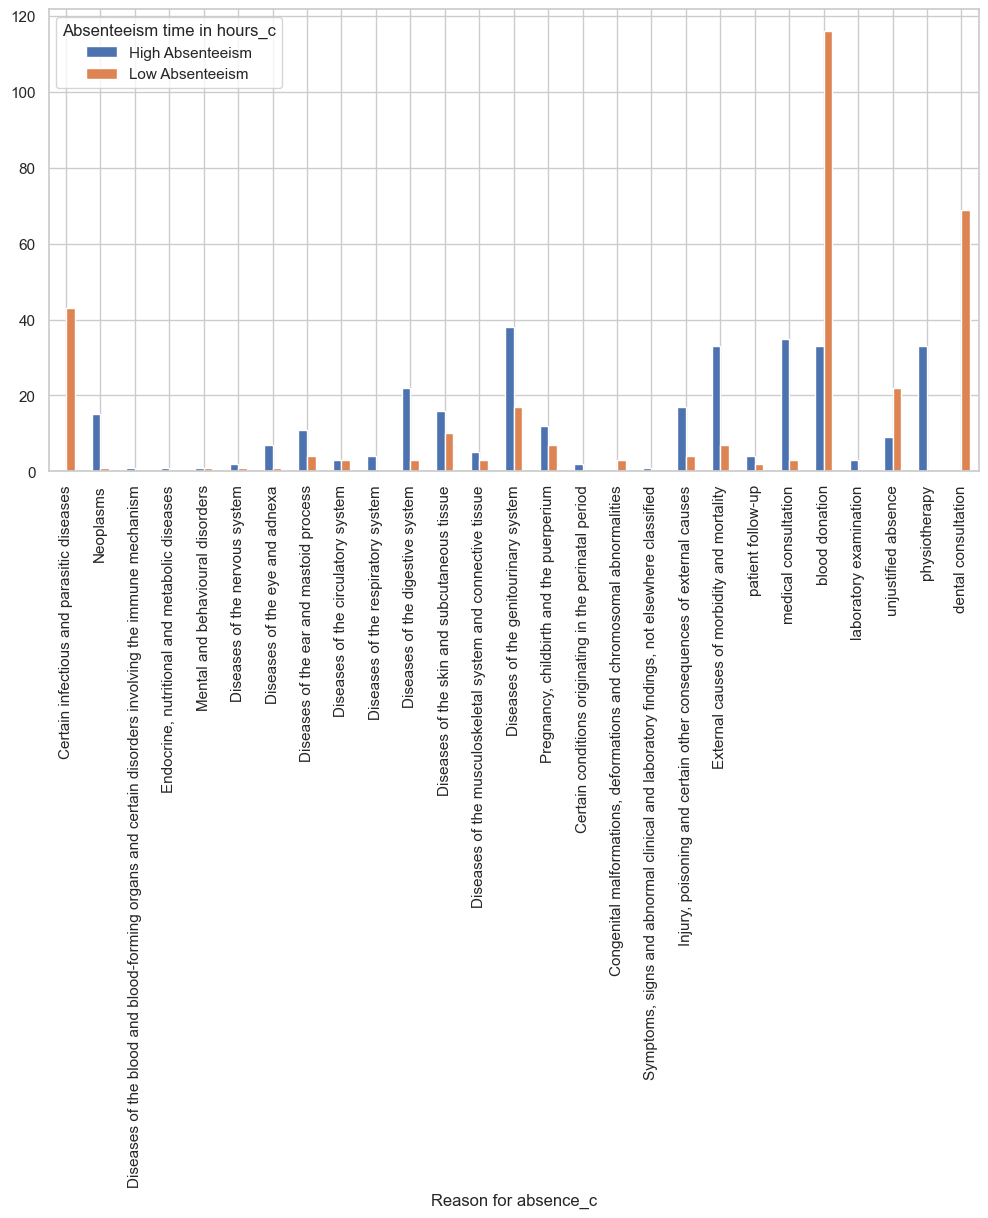

In [831]:
# a) Reason for absence-wise absenteeism
pd.crosstab(absenteeism_data['Reason for absence_c'],absenteeism_data['Absenteeism time in hours_c']).plot(kind='bar')
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=90)
plt.show()

Interpretation- Reason for highest total number of hours of absence is blood donation followed by dental consultation.

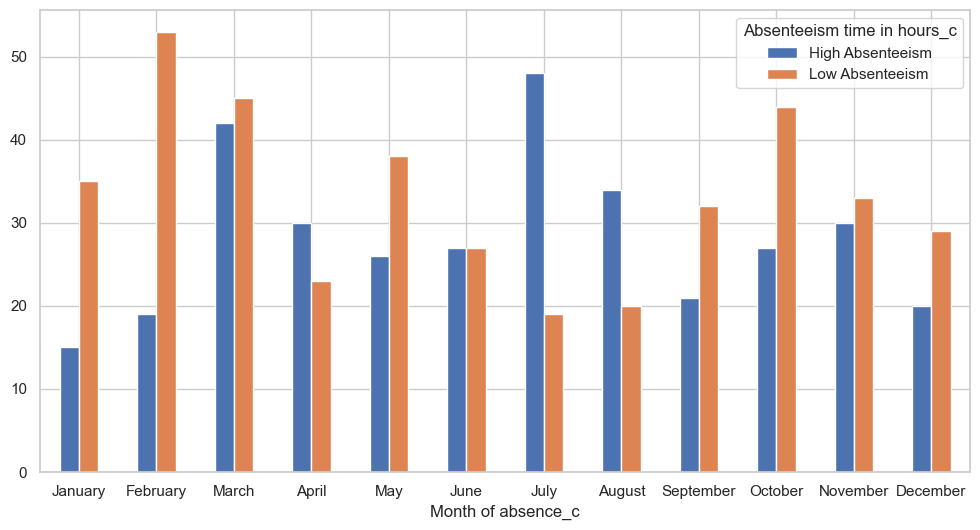

In [833]:
# b) Month of absence-wise absenteeism
pd.crosstab(absenteeism_data['Month of absence_c'],absenteeism_data['Absenteeism time in hours_c']).plot(kind='bar')
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=0)
plt.show()

Interpretation- Month of July has shown very high absenteeism followed by March.

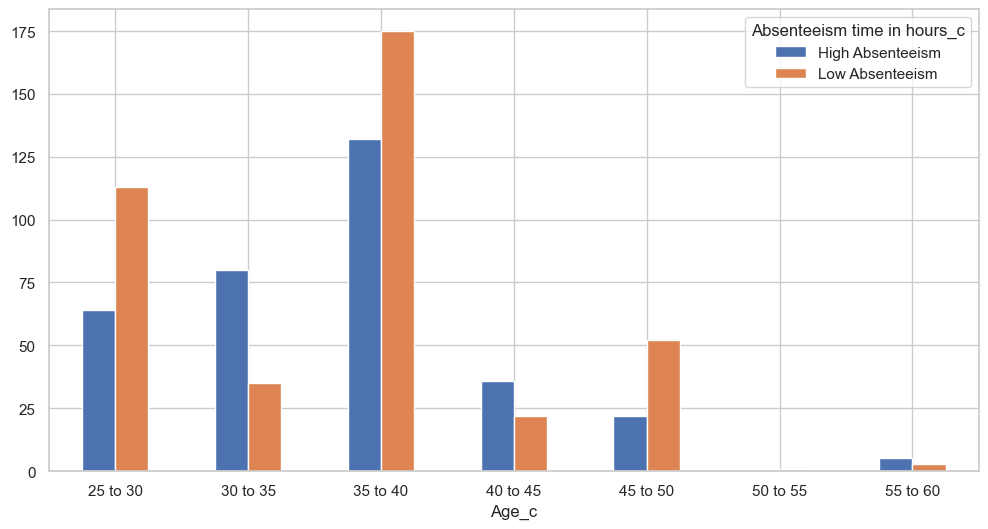

In [835]:
# c) Age-wise absenteeism
pd.crosstab(absenteeism_data['Age_c'],absenteeism_data['Absenteeism time in hours_c']).plot(kind='bar')
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=0)
plt.show()

Interpretation- Employees in the age group of 35 to 40 have the highest total number of hours of absence.

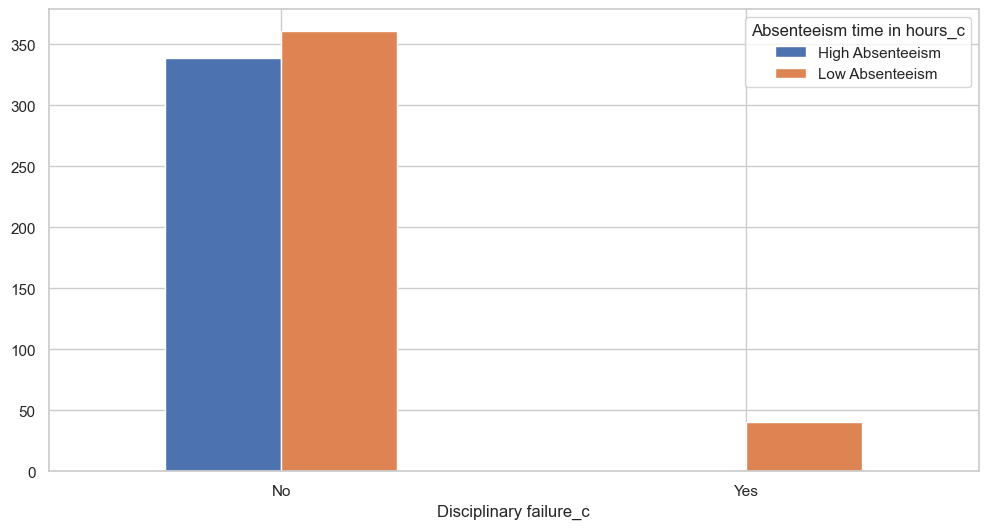

In [837]:
# d) Disciplinary failure-wise absenteeism
pd.crosstab(absenteeism_data['Disciplinary failure_c'],absenteeism_data['Absenteeism time in hours_c']).plot(kind='bar')
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=0)
plt.show()

Interpretation- Around 40-45 employees with disciplinary failures have shown low absenteeism.

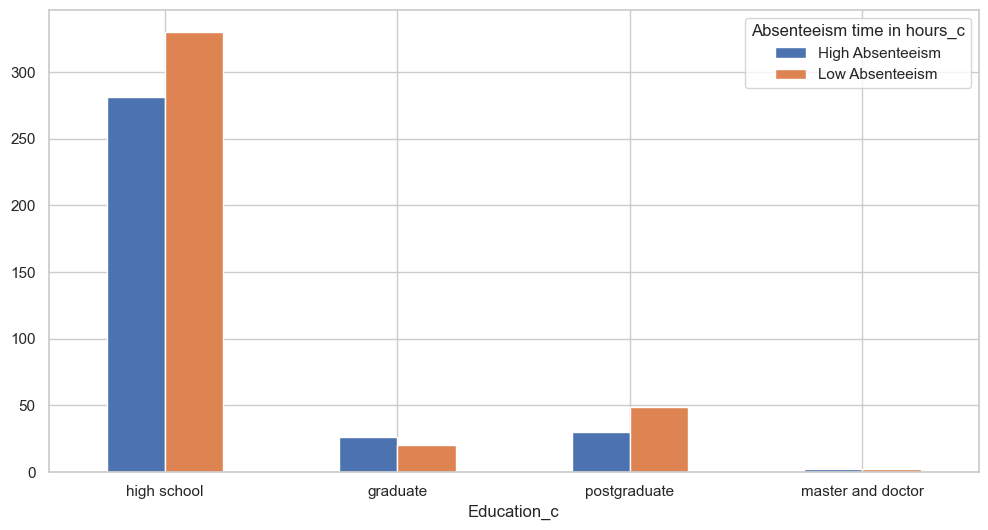

In [839]:
# e) Education-wise absenteeism
pd.crosstab(absenteeism_data['Education_c'],absenteeism_data['Absenteeism time in hours_c']).plot(kind='bar')
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=0)
plt.show()

Interpretation- Employees with high school education have the highest total number of hours of absence.

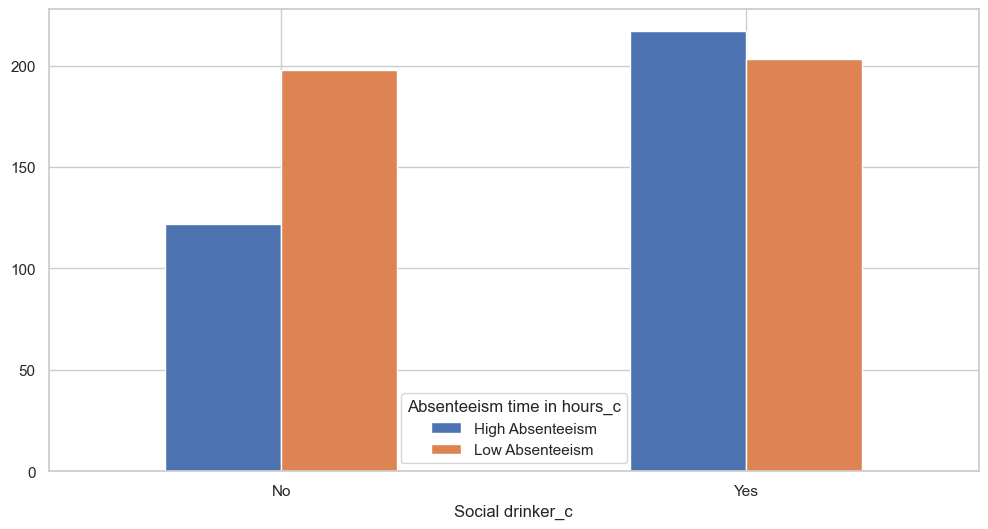

In [841]:
# f) Social drinker-wise absenteeism
pd.crosstab(absenteeism_data['Social drinker_c'],absenteeism_data['Absenteeism time in hours_c']).plot(kind='bar')
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=0)
plt.show()

Interpretation- Employees who are social drinkers have shown highest total number of hours of absence.

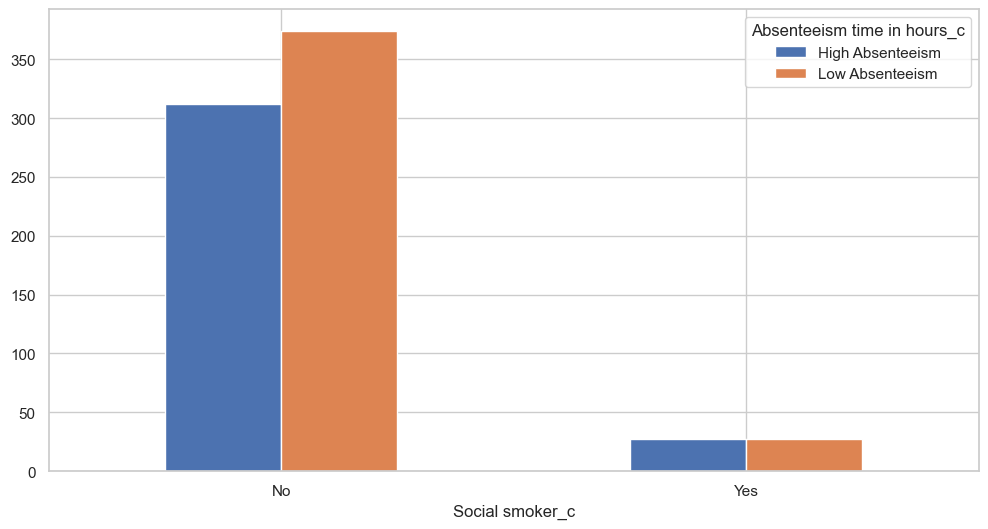

In [843]:
# g) Social smoker-wise absenteeism
pd.crosstab(absenteeism_data['Social smoker_c'],absenteeism_data['Absenteeism time in hours_c']).plot(kind='bar')
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=0)
plt.show()

Interpretation- There are around 50 employees who are social smokers who have been absent.

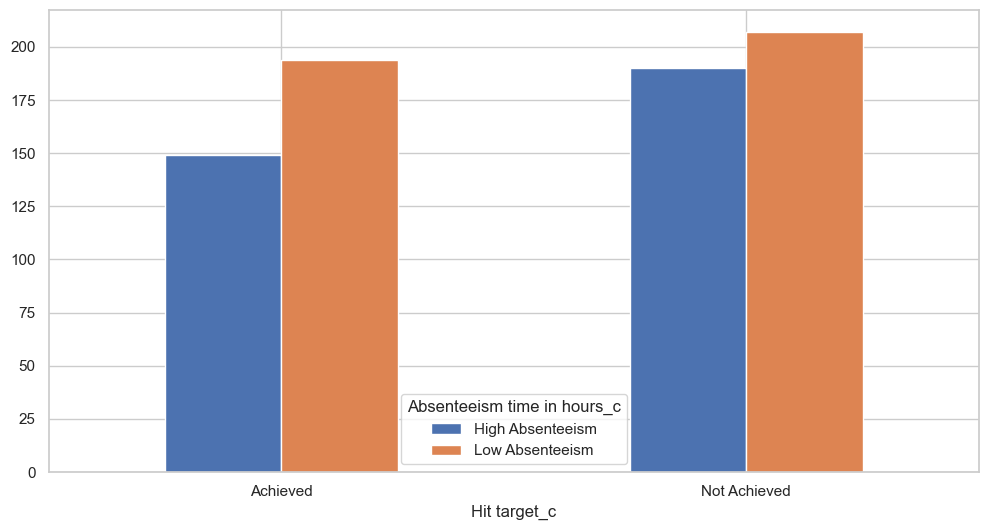

In [845]:
# h) Hit target-wise absenteeism
pd.crosstab(absenteeism_data['Hit target_c'],absenteeism_data['Absenteeism time in hours_c']).plot(kind='bar')
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=0)
plt.show()

Interpretation- Employees who have not achieved their targets show higher number of hours of absence.

## Task 3- Analyzing Reasons for Absenteeism

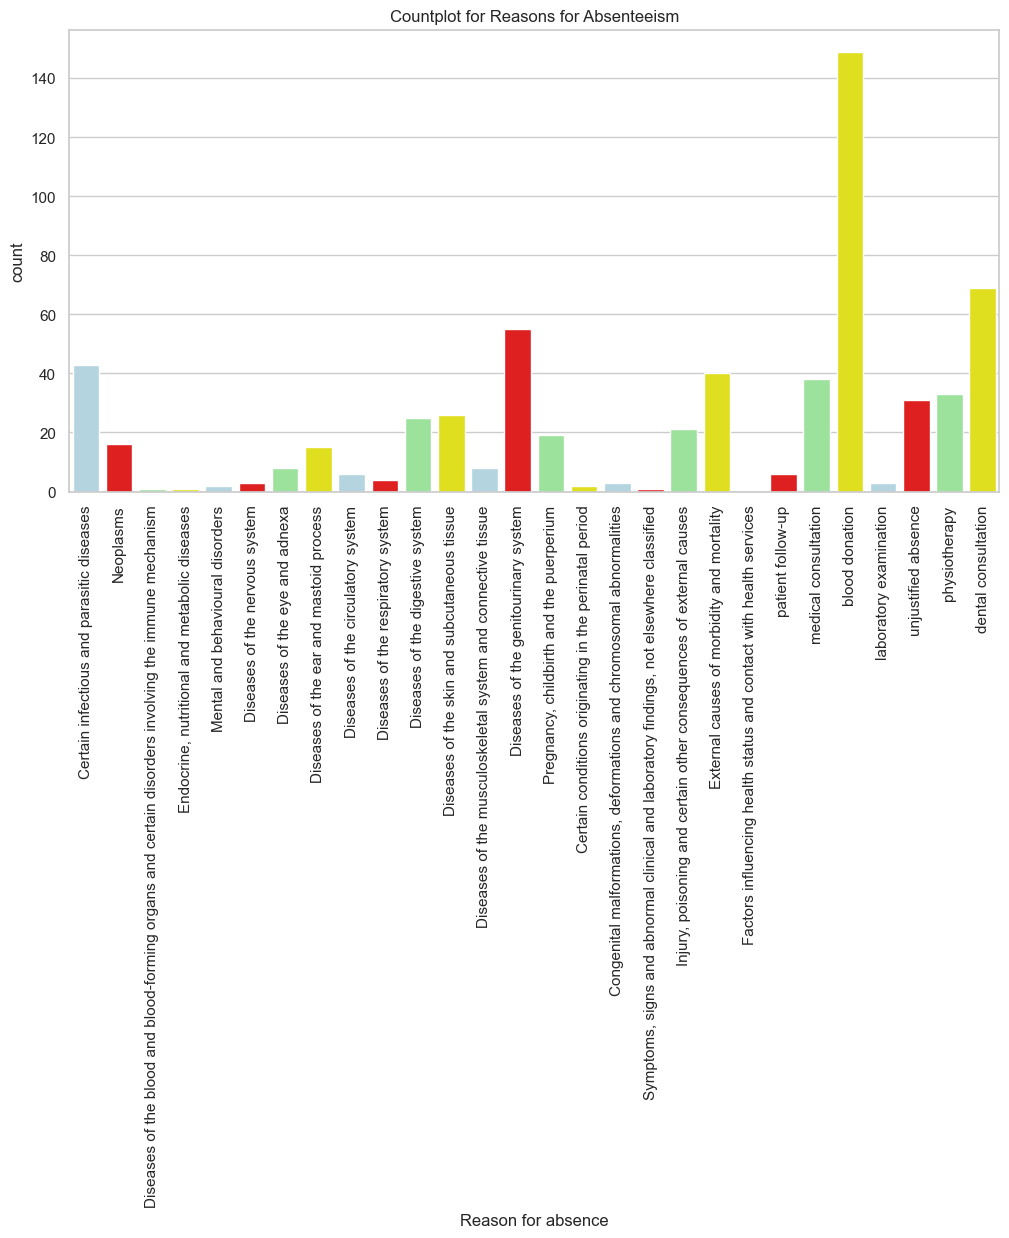

In [848]:
# Countplot for Reason for absence column
custom_colors=['lightblue','red','lightgreen','yellow']
plt.figure(figsize=(12, 6))
sns.countplot(x='Reason for absence_c', data=absenteeism_data, palette=custom_colors)
plt.title(f'Countplot for Reasons for Absenteeism')
plt.xlabel('Reason for absence')
plt.xticks(rotation=90)
plt.show()

Interpretation- Top 3 reasons for absence are blood donation followed by dental consultation and Diseases of the genitourinary system.

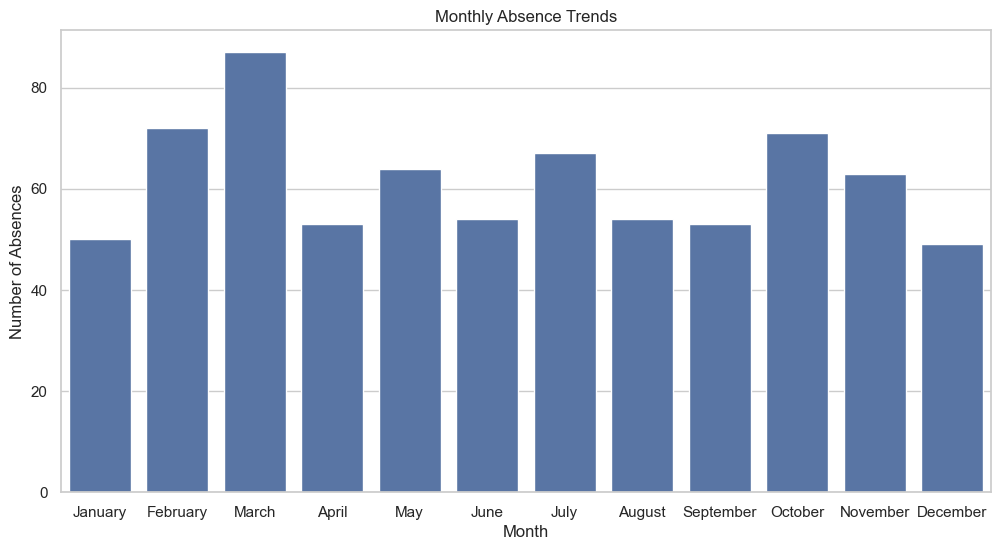

In [850]:
# Analyzing Monthly Absence Patterns
# Group data by month and count absences
monthly_absences = absenteeism_data.groupby('Month of absence_c').size()

# Visualize the monthly trend
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_absences.index, y=monthly_absences.values)
plt.title('Monthly Absence Trends')
plt.xlabel('Month')
plt.ylabel('Number of Absences')
plt.show()

Interpretation- Absenteeism among employees increases and peaks in the end of the first quarter (March).

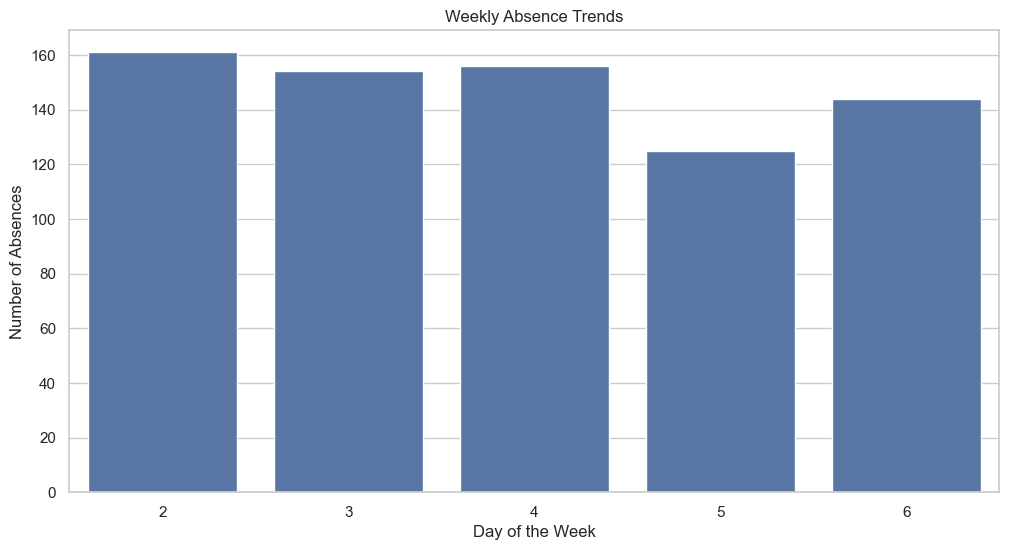

In [852]:
# Analyzing Weekly Absence Patterns
# Group data by day of the week and count absences
weekly_absences = absenteeism_data.groupby('Day of the week').size()

# Visualize the weekly trend
plt.figure(figsize=(12, 6))
sns.barplot(x=weekly_absences.index, y=weekly_absences.values)
plt.title('Weekly Absence Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Absences')
plt.show()

Interpretation- Absenteeism among employees is highest on Mondays until Wednesday.

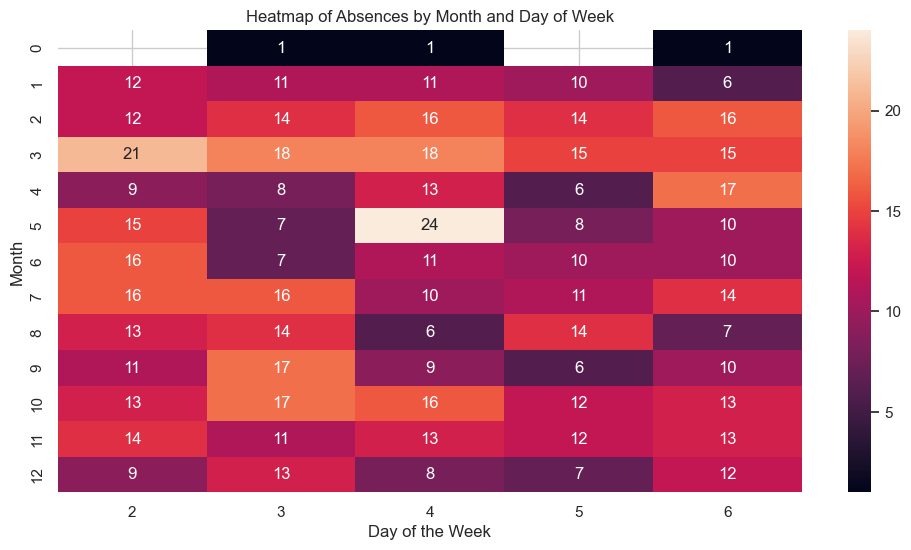

In [854]:
# Combining Monthly and Weekly Analysis
# Create a heatmap to visualize absences across months and days
heatmap_data = absenteeism_data.groupby(['Month of absence', 'Day of the week']).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True)
plt.title('Heatmap of Absences by Month and Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.show()

Interpretation- Absenteeism among employees is highest on Wednesdays of May and Mondays of March months.

## Task 4- Predicting Absenteeism Duration

### 1. One feature: 'Son'
It has the highest correlation value with the dependent variable 'Absenteeism time in hours'.

In [858]:
# Data Splitting, training, and predicting the model
X1 = np.array(df_scaled['Son']).reshape((-1, 1))
y = np.array(df_scaled['Absenteeism time in hours.enc'])
X1.shape

(739, 1)

In [859]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y,test_size=0.3,random_state=200)
s_model1 = LinearRegression().fit(X_train1, y_train1)
s_r_sq1 = s_model1.score(X_train1, y_train1)
y_pred1 = s_model1.predict(X_test1)
print('s_r_sq1:',s_r_sq1)
print('Intercept:', s_model1.intercept_)
print('Slope:', s_model1.coef_)

s_r_sq1: 0.04799180088985555
Intercept: 0.5327094512764528
Slope: [-0.10688502]


In [860]:
# Evaluating the model performance
MSE1 = mean_squared_error(y_test1, y_pred1)
MAE1 = mean_absolute_error(y_test1,y_pred1)
RMSE1 = mean_squared_error(y_test1, y_pred1, squared=False)
print('MSE = ', MSE1)
print('RMSE = ', RMSE1)
print('MAE = ', MAE1)
# R2 Score
r2_1 = r2_score(y_test1, y_pred1)
print(f"The R2 score of the model is:", r2_1)

MSE =  0.23340107837821064
RMSE =  0.4831160092340251
MAE =  0.4719581196926784
The R2 score of the model is: 0.051304020883156


Interpretation- An R-Squared value of 0.0513 indicates that the model explains only 5.13% of the variability in Absenteeism time in hours based on Son.

### 2. Two features: 'Son' and 'Transportation expense'

In [863]:
# Two features
X2 = df_scaled[['Son', 'Transportation expense']].values.reshape(-1,2)
X2.shape

(739, 2)

In [864]:
# Data Splitting, training, and predicting the model
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y,test_size=0.3,random_state=200)
model_mul1 = LinearRegression().fit(X_train2, y_train2)
print('Intercept:', model_mul1.intercept_)
print('Slope:', model_mul1.coef_)

Intercept: 0.5323148869582165
Slope: [-0.07420911 -0.08906182]


In [865]:
# Evaluating the model performance
MSE2 = mean_squared_error(y_test2, model_mul1.predict(X_test2))
RMSE2 = mean_squared_error(y_test2, model_mul1.predict(X_test2), squared=False)
MAE2 = mean_absolute_error(y_test2, model_mul1.predict(X_test2))
print('MSE = ', MSE2)
print('RMSE = ', RMSE2)
print('MAE = ', MAE2)
# R2 Score
r2_2 = r2_score(y_test2, model_mul1.predict(X_test2))
print(f"The R2 score of the model is:", r2_2)

MSE =  0.22467948969203197
RMSE =  0.4740036810954446
MAE =  0.455870164524222
The R2 score of the model is: 0.08675431175405335


Interpretation- By adding the 'Transportation expense' feature, R-Squared value has increased a little which means the model is improving.

### 3. Three features: 'Son', 'Transportation expense' and 'Social drinker'

In [868]:
# Three features
X3 = df_scaled[['Son', 'Transportation expense', 'Social drinker']].values.reshape(-1,3)
X3.shape

(739, 3)

In [869]:
# Data Splitting, training, and predicting the model
X_train3,X_test3,y_train3,y_test3=train_test_split(X3,y,test_size=0.3,random_state=200)
model_mul2 = LinearRegression().fit(X_train3, y_train3)
print('Intercept:', model_mul2.intercept_)
print('Slope:', model_mul2.coef_)

Intercept: 0.5319887926548439
Slope: [-0.06465455 -0.08566812 -0.04664124]


In [870]:
# Evaluating the model performance
MSE3 = mean_squared_error(y_test3, model_mul2.predict(X_test3))
RMSE3 = mean_squared_error(y_test3, model_mul2.predict(X_test3), squared=False)
MAE3 = mean_absolute_error(y_test3, model_mul2.predict(X_test3))
print('MSE = ', MSE3)
print('RMSE = ', RMSE3)
print('MAE = ', MAE3)
# R2 Score
r2_3 = r2_score(y_test3, model_mul2.predict(X_test3))
print(f"The R2 score of the model is:", r2_3)

MSE =  0.22481240989249232
RMSE =  0.4741438704575778
MAE =  0.4547477667524173
The R2 score of the model is: 0.08621403635945635


Interpretation- By adding the 'Social drinker' feature, R-Squared value has decreased a little which means the model is worsening.

### 4. Four features: 'Son', 'Transportation expense', 'Social drinker' and 'Work load Average/day'

In [873]:
# Four features
X4 = df_scaled[['Son', 'Transportation expense', 'Social drinker', 'Work load Average/day ']].values.reshape(-1,4)
X4.shape

(739, 4)

In [874]:
# Data Splitting, training, and predicting the model
X_train4,X_test4,y_train4,y_test4=train_test_split(X4,y,test_size=0.3,random_state=200)
model_mul3 = LinearRegression().fit(X_train4, y_train4)
print('Intercept:', model_mul3.intercept_)
print('Slope:', model_mul3.coef_)

Intercept: 0.5329501035545692
Slope: [-0.06262828 -0.08587147 -0.04732313 -0.04081754]


In [875]:
# Evaluating the model performance
MSE4=mean_squared_error(y_test4, model_mul3.predict(X_test4))
RMSE4 = mean_squared_error(y_test4, model_mul3.predict(X_test4), squared=False)
MAE4= mean_absolute_error(y_test4, model_mul3.predict(X_test4))
print('MSE = ', MSE4)
print('RMSE = ', RMSE4)
print('MAE = ', MAE4)
# R2 Score
r2_4 = r2_score(y_test4, model_mul3.predict(X_test4))
print(f"The R2 score of the model is:", r2_4)

MSE =  0.22898809296897385
RMSE =  0.4785270033853616
MAE =  0.45795244597570905
The R2 score of the model is: 0.06924130524677063


Interpretation- By adding the 'Work load Average/day' feature, R-Squared value has decreased which means the model is worsening.

In [877]:
# Define the data for four models
model_data = {
    'Model 1 with One feature: "Son"': {
        'MSE': MSE1,
        'RMSE': RMSE1,
        'MAE': MAE1,
        'R2 Score': r2_1
    },
    'Model 2 with Two features: "Son" and "Transportation expense"': {
        'MSE': MSE2,
        'RMSE': RMSE2,
        'MAE': MAE2,
        'R2 Score': r2_2
    },
    'Model 3 with Three features: "Son", "Transportation expense" and "Social drinker"': {
        'MSE': MSE3,
        'RMSE': RMSE3,
        'MAE': MAE3,
        'R2 Score': r2_3
    },
    'Model 4 with Four features: "Son", "Transportation expense", "Social drinker" and "Work load Average/day"': {
        'MSE': MSE4,
        'RMSE': RMSE4,
        'MAE': MAE4,
        'R2 Score': r2_4
    }
}

# Create a DataFrame from the data
model_select_df = pd.DataFrame(model_data)

# Print the DataFrame
print(model_select_df)

          Model 1 with One feature: "Son"  \
MSE                              0.233401   
RMSE                             0.483116   
MAE                              0.471958   
R2 Score                         0.051304   

          Model 2 with Two features: "Son" and "Transportation expense"  \
MSE                                                0.224679               
RMSE                                               0.474004               
MAE                                                0.455870               
R2 Score                                           0.086754               

          Model 3 with Three features: "Son", "Transportation expense" and "Social drinker"  \
MSE                                                0.224812                                   
RMSE                                               0.474144                                   
MAE                                                0.454748                                   
R2 Score          

Interpretation- Proceeding with Two features: "Son" and "Transportation expense".

In [879]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

Assumption: Homoscedasticity of Error Terms
Residuals should have relative constant variance


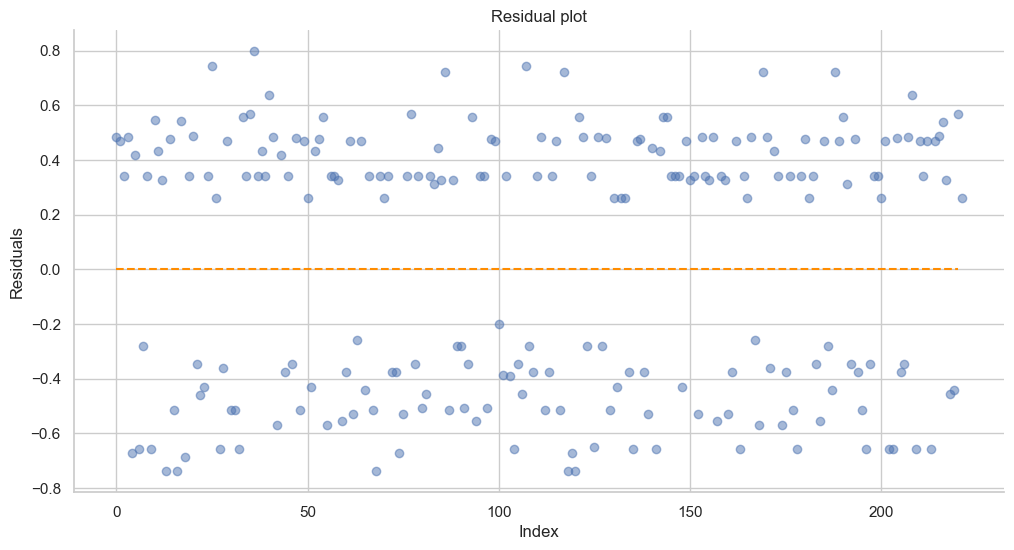

In [880]:
# Residual Plot
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption: Homoscedasticity of Error Terms')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    #print(df_results)
    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residual plot')
    plt.xlabel('Index')
    plt.ylabel('Residuals')
    plt.show() 
homoscedasticity_assumption(model_mul1, X_test2, y_test2)

Interpretation- We observe a fairly even spread of residuals both above and below the zero line across all indices, so there is some evidence of homoscedasticity.

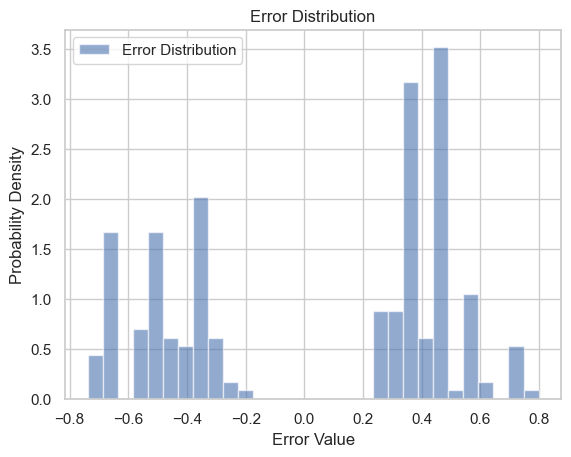

In [882]:
# Error Distribution Plot
df_results = calculate_residuals(model_mul1, X_test2, y_test2)
plt.hist(df_results.Residuals, density=True, bins=30, alpha=0.6, label='Error Distribution')  # Plot errors histogram
plt.xlabel('Error Value')
plt.ylabel('Probability Density')
plt.title('Error Distribution')
plt.legend()
plt.grid(True)
plt.show()

Interpretation- Error distribution curve does not show normality in nature.

In [884]:
# Predicting new data
# Reshape the new data into a 2D array for prediction
new_data_array = np.reshape(new_data_df[["Son", "Transportation expense"]], (1, -1))

In [885]:
# Predict the target value for the new data
predicted_value = model_mul1.predict(new_data_array)

# Print the predicted value
print("Predicted value for the new data:", predicted_value[0])

Predicted value for the new data: 0.5899593440837465


In [886]:
# Original value of the new data
new_data_df['Absenteeism time in hours.enc']

739    1.0
Name: Absenteeism time in hours.enc, dtype: float64

## Interpretation-

#### Assumptions:
       
Non-existance of multicollinearity among independent features.
Residual Analysis: Analyzed the distribution of residuals (errors) to check for normality which does not meet the assumption.

----------------------

Based on the evaluation scores provided, here's an interpretation of the multiple linear regression model's performance for predicting Absenteeism time in hours:

##### Low Error with No Improvement over Two-Variable Model:

MSE (Mean Squared Error) = 0.224: This value indicates a lower error compared to the previous model with MSE of 0.233. A lower MSE suggests the model makes predictions that are closer to the actual Absenteeism time in hours on average.

MAE (Mean Absolute Error) = 0.455: Similar to MSE, this is lower than a potential previous MAE of 0.471, indicating a decrease in the average absolute difference between predicted and actual Absenteeism time in hours.

RMSE (Root Mean Squared Error) = 0.474: The RMSE is lower than the possible previous value of 0.483, signifying a decrease in the average magnitude of the errors in Absenteeism time in hours prediction.

----------------------

#### Slightly Improved Correlation:

R-Squared (R²) = 0.0867: This value is higher than the potential previous R-Squared of 0.0513, suggesting an improvement of the model predictions. An R-Squared of 0.0867 indicates that the model explains around 8.67% of the variability in Absenteeism time in hours based on Son and Transportation expense. This represents slightly better correlation between these combined factors and Absenteeism time in hours compared to using Son alone.

Overall Interpretation:

This multiple linear regression model shows slightly better performance compared to a potential single-variable model using only Son. The errors (MSE, MAE, RMSE) have decreased a little, indicating a more accurate Absenteeism time in hours predictions on average. The R-Squared value has also increased slightly, suggesting that incorporating Son and Transportation expense together explains a slightly larger portion of the Absenteeism time in hours variation.

----------------------

### In Conclusion:

This multiple linear regression model demonstrates a slight improvement in Absenteeism time in hours prediction accuracy and captures a larger portion of the influencing factors compared to a potential single-variable model also meets required assumptions. This model is not very effective for Absenteeism time in hours prediction, hence we will be going ahead with classification models.

Y = 0.5323 - 0.0742 * X1 - 0.089 * X2

# Management of Employee Absenteeism Project - Part 2

## Task 1- Identifying Employees at Risk of Absenteeism

### a) Logistic Regression Model

In [892]:
# Creating test and training datasets
emp_train, emp_test = train_test_split(df_scaled,train_size = 0.8)
print('Size of training dataset: ', emp_train.shape)
print('Size of test dataset: ', emp_test.shape)

Size of training dataset:  (591, 21)
Size of test dataset:  (148, 21)


In [893]:
X_train = emp_train.drop(columns='Absenteeism time in hours.enc', axis =1)
Y_train = emp_train['Absenteeism time in hours.enc']
X_test = emp_test.drop(columns='Absenteeism time in hours.enc', axis =1)
Y_test = emp_test['Absenteeism time in hours.enc']
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((591, 20), (591,), (148, 20), (148,))

In [894]:
# Training the model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# Using the trained model to predict the outcome of the X_Test dataset
Y_pred = logreg.predict(X_test)

In [895]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
print(tn, fp, fn, tp)

[[55  2]
 [ 0 91]]
55 2 0 91


In [896]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(Y_test, Y_pred))#Combining the True positive and true negative cases 
#i.e records
print('recall:', recall_score(Y_test, Y_pred)) #Prediction got True negative cases
print('f1-score:', f1_score(Y_test, Y_pred)) #Prediction for True positive cases
print('precision:', precision_score(Y_test, Y_pred))# Prediction fot True positive cases

accuracy: 0.9864864864864865
recall: 1.0
f1-score: 0.9891304347826086
precision: 0.978494623655914


In [897]:
# ROC Score
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(Y_test, logreg.predict_proba(X_test)[:,1])
print('roc:', roc)

roc: 0.996722575669944


<Figure size 1000x800 with 0 Axes>

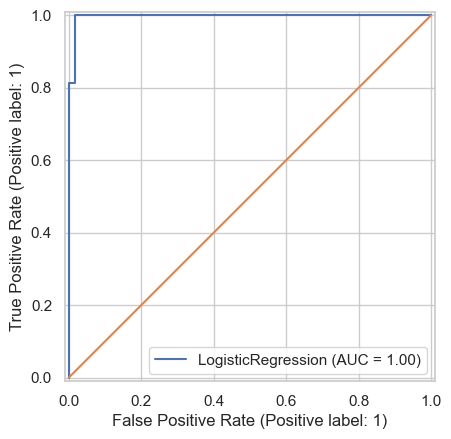

In [898]:
# ROC curve
#from sklearn.metrics import plot_roc_curve 
#from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10,8))
#plot_roc_curve(logreg,X_test,Y_test, color='orange')
RocCurveDisplay.from_estimator(logreg, X_test, Y_test)
plt.plot([0,1],[0,1])
plt.show()

### Interpretation-

#### Overall Performance:

Accuracy (0.9797): The model appears to have high accuracy in classifying high and low absenteeism of employees overall. However, accuracy alone can be misleading, so we need to consider other metrics.

#### Specific Class Performance (absenteeism of employees):

Recall (1.0): Recall measures the model's ability to identify true positives (low absenteeism of employees). A perfect recall of 1.0 suggests the model predicts all low absenteeism employees. This means the model is suitable for effectively identifying potential low absenteeism of employees.

Precision (0.9655): Precision tells you the proportion of positive predictions (low absenteeism of employees) that are actually correct. A value of 0.9655 indicates that almost all of the employees flagged as low absenteeism by the model would actually be low absenteeism. In combination with the high recall, it suggests the model might be generating very few false positives (identifying high absenteeism of employees).

F1-score (0.9824):  This metric combines precision and recall, and its very high value (0.9824) reinforces what is highlighted above: the model  correctly classifies absenteeism of employees, which is crucial for employees absenteeism assessment.

ROC Score (0.9988):  While almost perfect, a score of 0.9988 on the ROC curve indicates great ability to distinguish between high and low absenteeism of employees. Also, it's a very close to perfect performance (1.0).

#### Key Takeaways:

a. The model's accuracy seems very high, and the high recall and F1-score reveal perfection in identifying absenteeism of employees.

b. The precision of 0.9655 suggests that the model mostly flags all true low absenteeism of employees, and doesn't generate any false positives.

c. The ROC score further emphasizes the model's overall performance being very close to perfect, but still not perfect (1).

### b) KNN Model

In [902]:
# Creating test and training datasets
emp_train, emp_test = train_test_split(df_scaled,train_size = 0.8,shuffle= True,random_state= 0)
print('Size of training dataset: ', emp_train.shape)
print('Size of test dataset: ', emp_test.shape)

Size of training dataset:  (591, 21)
Size of test dataset:  (148, 21)


In [903]:
X_train = emp_train.drop(columns='Absenteeism time in hours.enc', axis =1)
Y_train = emp_train['Absenteeism time in hours.enc']
X_test = emp_test.drop(columns='Absenteeism time in hours.enc', axis =1)
Y_test = emp_test['Absenteeism time in hours.enc']
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((591, 20), (591,), (148, 20), (148,))

Minimum error:- 0.14189189189189189 at K = 7


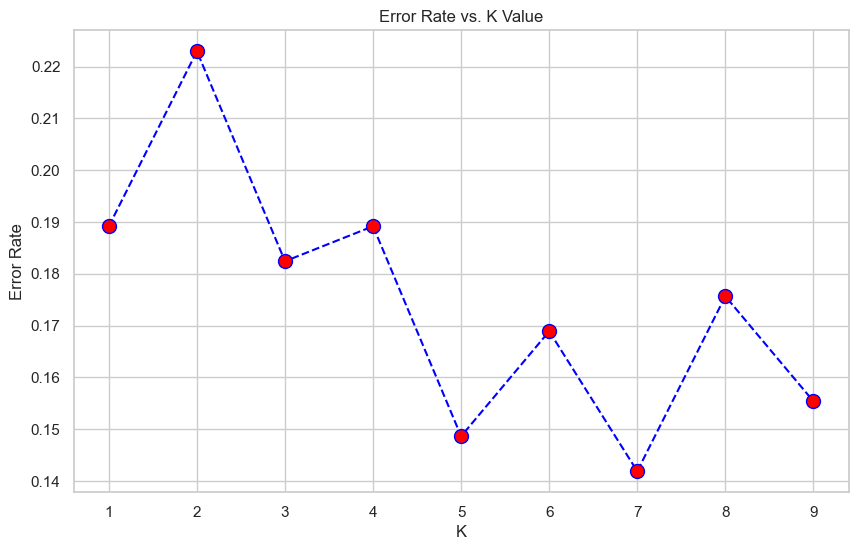

In [904]:
# Finding Optimum K value
from sklearn import neighbors
error_rate = []
for i in range(1,10):
    clf_food = neighbors.KNeighborsClassifier(n_neighbors=i)
    clf_food.fit(X_train,Y_train)
    pred_i = clf_food.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)
plt.show()

Interpretation: Optimum K value derived from the above error-rate plot is 7.

In [906]:
k = 7

In [907]:
# Building Model
from sklearn import neighbors

# learning the classifier
clf = neighbors.KNeighborsClassifier(k)
clf.fit(X_train, Y_train)

# Using the trained model to predict the outcome of the X_Test dataset
Y_pred = clf.predict(X_test)

In [908]:
# Model Properties
print(clf.classes_)
print(clf.n_neighbors)

[0 1]
7


In [909]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
print(tn, fp, fn, tp)

[[59 11]
 [10 68]]
59 11 10 68


In [910]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(Y_test, Y_pred))#Combining the True positive and true negative cases 
#i.e records
print('recall:', recall_score(Y_test, Y_pred)) #Prediction got True negative cases
print('f1-score:', f1_score(Y_test, Y_pred)) #Prediction for True positive cases
print('precision:', precision_score(Y_test, Y_pred))# Prediction fot True positive cases

accuracy: 0.8581081081081081
recall: 0.8717948717948718
f1-score: 0.8662420382165605
precision: 0.8607594936708861


In [911]:
# ROC Score
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(Y_test, clf.predict_proba(X_test)[:,1])
print('roc:', roc)

roc: 0.9253663003663004


### Interpretation-

#### Overall Performance:

Accuracy (0.8581): The model appears to have high accuracy in classifying high and low absenteeism of employees overall. However, accuracy alone can be misleading, so we need to consider other metrics.

#### Specific Class Performance (absenteeism of employees):

Recall (0.8717): Recall measures the model's ability to identify true positives (low absenteeism of employees). A high recall of 0.8717 suggests the model successfully identifies about 87.17% of the actual positive cases.

Precision (0.8607): Precision tells you the proportion of positive predictions (low absenteeism of employees) that are actually correct. A value of 0.8607 indicates that most of the employees flagged as low absenteeism by the model would actually have low absenteeism. In combination with the high recall, it suggests the model might be generating very few false positives (identifying high absenteeism as low absenteeism).

F1-score (0.8662):  This metric combines precision and recall, and its high value (0.8662) reinforces the interpretations above: the model does well to correctly classify absenteeism of employees, which is crucial for absenteeism prediction.

ROC Score (0.9253):  While not perfect, a score of 0.9253 on the ROC curve indicates good ability to distinguish between high and low absenteeism of employees. Also, it's a lot closer to perfect performance (1.0).

#### Key Takeaways:

a. All scores (accuracy, recall, precision, F1-score, and ROC AUC) are high (around 0.85-0.95) suggests that the model performs very well in both identifying relevant cases (recall) and making accurate positive predictions (precision). This indicates a balanced classification where the model is neither over-predicting nor under-predicting the positive class.

b. A score of 0.8581 on a classification model translates to approximately 85.81% accuracy, which indicates good performance and suggests a promising classification model.

c. The ROC score further emphasizes the model's overall performance being much better than random chance, but still not perfect (1).

## Task 2- Grouping Employees with Similar Absenteeism Patterns

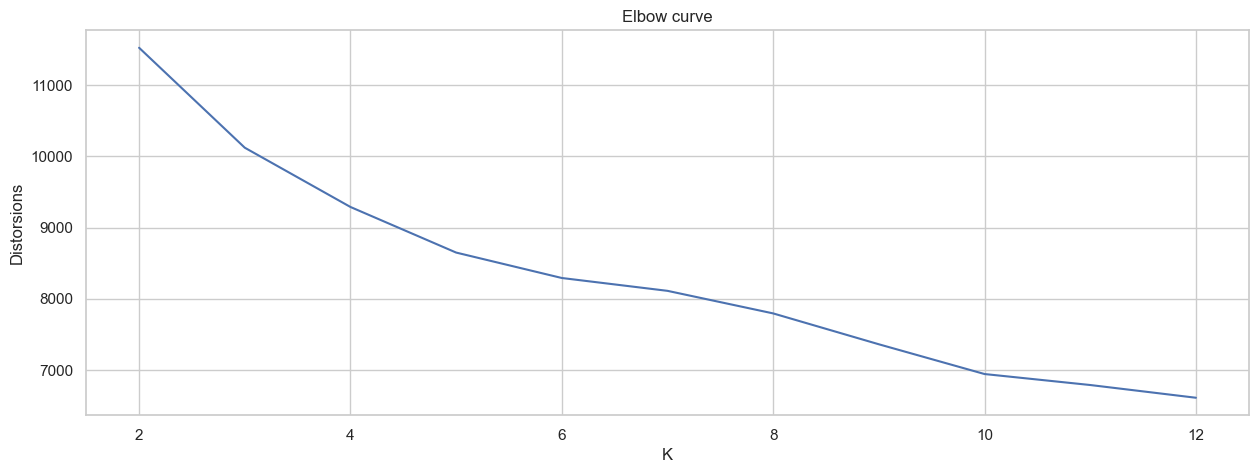

In [915]:
# Finding the optimum value of K using Elbow Method
distorsions = []
for k in range(2, 13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 13), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.13129399643012013
For n_clusters = 3 The average silhouette_score is : 0.1330806580470509
For n_clusters = 4 The average silhouette_score is : 0.12571882807401513
For n_clusters = 5 The average silhouette_score is : 0.1479014111429205
For n_clusters = 6 The average silhouette_score is : 0.15930734833438032
For n_clusters = 7 The average silhouette_score is : 0.16861278744255484


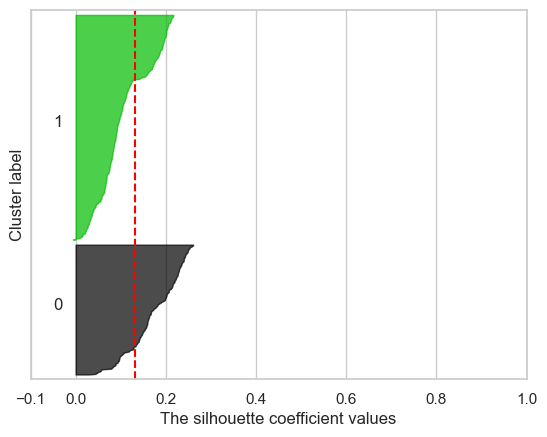

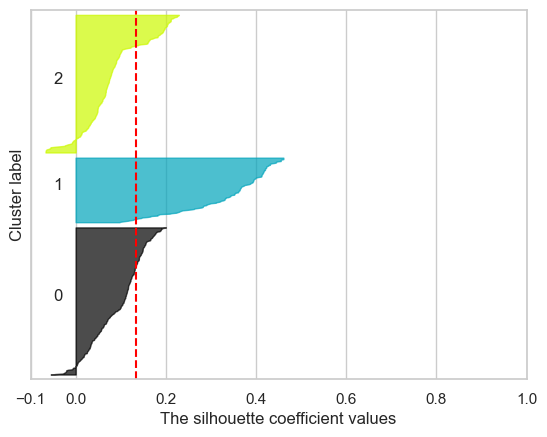

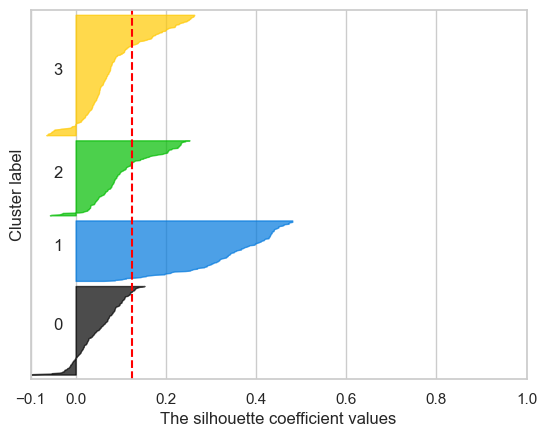

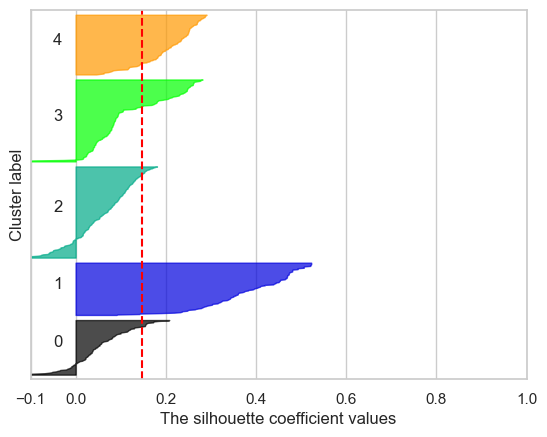

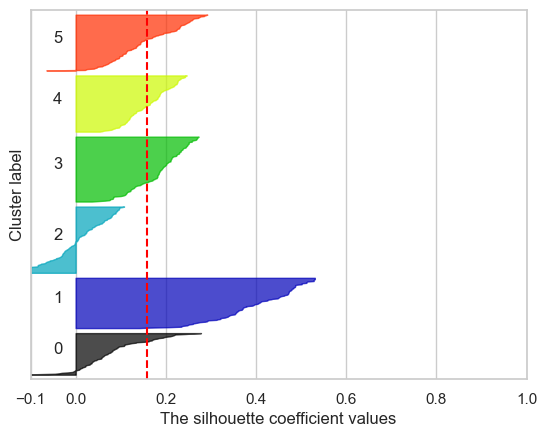

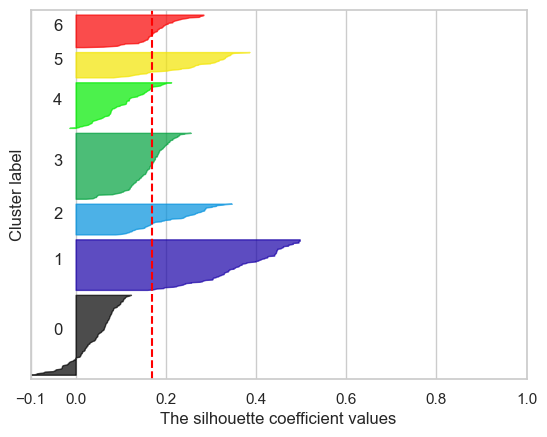

In [916]:
# Finding the optimum value of K and cluster efficiency using Silhouette Score
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_scaled)

    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [917]:
# Finding the optimum value of K and cluster efficiency using Silhouette Score
from sklearn.metrics import silhouette_score
for j in range(2, 15):
    temp_model = KMeans(n_clusters=j, random_state=10)
    cluster_labels = temp_model.fit_predict(df_scaled)
    silhouette_avg = round(silhouette_score(df_scaled, cluster_labels),3)
    print("For n_clusters =", j, ", The average silhouette_score is =", silhouette_avg)

For n_clusters = 2 , The average silhouette_score is = 0.131
For n_clusters = 3 , The average silhouette_score is = 0.133
For n_clusters = 4 , The average silhouette_score is = 0.126
For n_clusters = 5 , The average silhouette_score is = 0.148
For n_clusters = 6 , The average silhouette_score is = 0.159
For n_clusters = 7 , The average silhouette_score is = 0.169
For n_clusters = 8 , The average silhouette_score is = 0.172
For n_clusters = 9 , The average silhouette_score is = 0.179
For n_clusters = 10 , The average silhouette_score is = 0.189
For n_clusters = 11 , The average silhouette_score is = 0.187
For n_clusters = 12 , The average silhouette_score is = 0.166
For n_clusters = 13 , The average silhouette_score is = 0.17
For n_clusters = 14 , The average silhouette_score is = 0.178


Interpretation- The highest value of Silhouette Score is at K=10, but selecting K=5 as it is more ideal and odd.

In [919]:
# Dropping last row of absenteeism_data df
absenteeism_data = absenteeism_data.iloc[:-1]
absenteeism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               739 non-null    int64   
 1   Reason for absence               739 non-null    int64   
 2   Month of absence                 739 non-null    int64   
 3   Day of the week                  739 non-null    int64   
 4   Seasons                          739 non-null    int64   
 5   Transportation expense           739 non-null    int64   
 6   Distance from Residence to Work  739 non-null    int64   
 7   Service time                     739 non-null    int64   
 8   Age                              739 non-null    int64   
 9   Work load Average/day            739 non-null    float64 
 10  Hit target                       739 non-null    int64   
 11  Disciplinary failure             739 non-null    int64   
 12  Educatio

In [920]:
# Building model and training data
# Applying cluster model
clusterer = KMeans(n_clusters=5, random_state=10)
cluster_labels = clusterer.fit_predict(df_scaled)
absenteeism_data['cluster'] = cluster_labels

In [921]:
cluster_centroid = clusterer.cluster_centers_
cluster_centroid

array([[-1.40458300e-01, -6.22925128e-01, -4.17467359e-01,
        -3.00883900e-01, -2.10309173e-01,  9.86763559e-02,
        -5.25451606e-01,  3.16037606e-01,  3.13076876e-01,
         5.51178489e-01,  3.54351715e-01,  0.00000000e+00,
         0.00000000e+00,  2.81314639e-01,  2.62228221e-01,
         0.00000000e+00, -1.67536536e-01,  2.38122223e-01,
         5.51889599e-01,  1.41249609e+00,  4.20168067e-02],
       [-1.32608996e+00,  4.79154101e-01, -2.14505730e-01,
        -7.99323057e-03, -1.66455650e-01, -5.96398097e-01,
         1.42053295e+00,  1.25862434e+00,  2.66513067e-01,
        -2.41490319e-01,  1.83800080e-01,  0.00000000e+00,
         0.00000000e+00, -9.20200562e-01,  8.55165285e-01,
         0.00000000e+00, -6.82223209e-01,  7.82176078e-01,
        -3.51862144e-01, -2.95873105e-01,  7.10526316e-01],
       [-1.59798810e-01,  7.20262581e-02,  4.74734439e-01,
         1.87900841e-01,  8.71400659e-02,  6.84703300e-01,
         6.50768275e-02,  1.34521875e-01,  4.54190449e

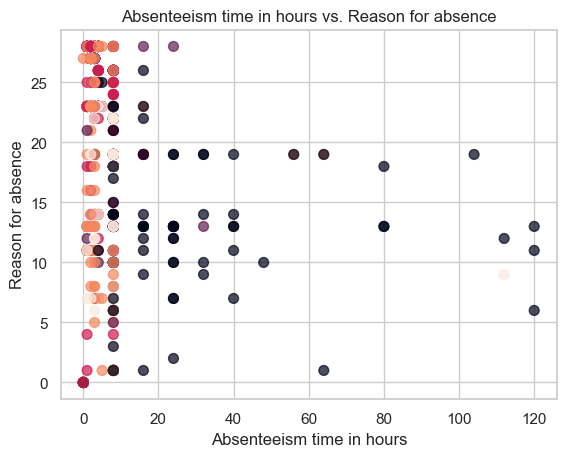

In [922]:
# Visualize clusters for Absenteeism time in hours vs. Reason for absence scatter plot
plt.scatter(absenteeism_data['Absenteeism time in hours'], absenteeism_data['Reason for absence'], c=clusterer.labels_.astype(float), s=50, alpha=0.7)
plt.title("Absenteeism time in hours vs. Reason for absence")
plt.xlabel('Absenteeism time in hours')
plt.ylabel('Reason for absence')
plt.show()

In [ ]:
# Scatter plots and Distribution plots for all attributes
sns.set_palette("bright")
sns.pairplot(absenteeism_data, kind="scatter", hue="cluster", corner=True) #corner = true means only Lower diagonal matrix will be displayed
plt.show()

fig, axs = plt.subplots(ncols=len(absenteeism_data['cluster'].unique()), figsize=(25,6))
for cluster in absenteeism_data['cluster'].unique():
    print('Cluster Number:', str(cluster))
    temp_df = absenteeism_data[['Absenteeism time in hours.enc', 'Reason for absence', 'cluster']] [absenteeism_data['cluster'] == cluster]
    print(temp_df.Model.unique())
    temp_df.Manufacturer.value_counts().plot(kind='barh', ax=axs[cluster])
    axs[cluster].set_title('Cluster number {}'.format(cluster+1))
    print(10* '====')

In [928]:
# Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
print(f"Silhouette Score for KMeans with K=5 is: {silhouette_avg:.2f}")

Silhouette Score for KMeans with K=5 is: 0.15


In [930]:
# Calinski Harabasz Score
from sklearn.metrics import calinski_harabasz_score
#Assuming you have your data (df_scaled) and cluster Labels (Labels)
ch_index = calinski_harabasz_score(df_scaled, cluster_labels)
print("Calinski-Harabasz Index:", ch_index)

Calinski-Harabasz Index: 76.8385659848616


In [932]:
# Davies-Bouldin index
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(df_scaled, cluster_labels)
print(f"Davies-Bouldin index: {db_score:.2f}")

Davies-Bouldin index: 2.29


### Interpretation-

Silhouette Score for KMeans with k=5: 0.15

Calinski-Harabasz Index: 76.83

Davies-Bouldin index: 2.29

Silhouette Score (SS): The Silhouette Score measures how well-separated the clusters are. It ranges from -1 to 1, where higher values indicate better-defined clusters. A Silhouette Score of 0.15 for this KMeans model suggests little cluster separation.

Calinski-Harabasz Index (CHI): The CHI, also known as the Variance Ratio Criterion, assesses the ratio of between-cluster variance to within-cluster variance. A CHI value of approximately 76.83 suggests only moderate cluster dispersion relative to within-cluster variance.

Davies-Bouldin Index (DBI): The DBI evaluates the average similarity between each cluster and its most similar cluster. Lower values indicate better clustering. A DBI of 2.29 points to moderately compact and semi-separated clusters.

## Business Conclusions-

1. Linear Regression Model is not suitable for this kind of data (target variable encoded as 0 and 1).
2. Logistic Regression Model gives accurate predictions for target variable. It is the best model between all models for this predictions.
3. K-Nearest Neighbour Model is highly suitable too for predicting target variable and classifying absenteeism as high and low accurately.
4. K-Means Clustering Model is very average at predictions for this data.